In [1]:
#!pip install --user -r requirements.txt

In [98]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
# Set up TWINT config
import twint
# Solve compatibility issues with notebooks and RunTime errors.
import nest_asyncio

# stopword
import nltk
from nltk.corpus import stopwords
nltk.download("vader_lexicon")
nltk.download('stopwords')
sw_nltk = stopwords.words('english')

import re
text_cleaning_regex = "@S+|https?:S+|http?:S|[^A-Za-z0-9]+"

from keras.models import Sequential
from keras.layers import LSTM,Flatten,Embedding,Dense,Conv2D,MaxPooling2D,Conv1D


# sklearn
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# bert
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler, WeightedRandomSampler,random_split
from transformers import BertModel,BertForSequenceClassification, Trainer, TrainingArguments, AutoTokenizer, AdamW, get_linear_schedule_with_warmup


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/swu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/swu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# check the device
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [5]:
nest_asyncio.apply()
c = twint.Config()
c.Search = "BTC"
c.Lang = "en"
c.Store_pandas = True
# c.Store_csv = True
# c.Output = "test.csv"
c.Limit = 1000
c.Pandas = True
twint.run.Search(c)

1494357220795899904 2022-02-17 09:04:59 -0800 <Rakib18507080> @CryptoTownEU Nice project and congratulations to the team for their efforts and dedication and highly appreciated the visionary thought of the projector and it will create history 👍it will go to moon.🚀🚀🚀  @Rimon73482851  @SHShish76672601  @Hasib11581685 #defi #BTC #BSC #ETH
1494357210629091336 2022-02-17 09:04:57 -0800 <TrgtTrm> Fenomenlern OBO’su obo’dan baska herşeye benziyor 😂 #Bitcoin #BTC  https://t.co/KGdmuYG5II
1494357209614274560 2022-02-17 09:04:57 -0800 <Cryptod91117326> I am very thankful to @Tradeosiann  for knowing me this dangerous #Bitcoin crash and #Crypto crash. That's because of you only  I didn't cause any type of losses. A huge thankyou to you once again. #BitcoinCrash $BTC #binance #MATIC Dogecoin crash  "accurate from all." Ww
1494357207219122178 2022-02-17 09:04:56 -0800 <0xConny> @pierre_crypt0 @ThinkingUSD @Pentosh1 @jimtalbot @trader1sz @Trader_XO @MuroCrypto @LSDinmycoffee @RektProof @Mindset_BTC 

1494357013714771968 2022-02-17 09:04:10 -0800 <Beermoney_Bot> #TradingPlan1895 START 🏁  BEAM / #BTC Entry Buy Price: 0.00000943  #AlgoTrade
1494357013106548738 2022-02-17 09:04:10 -0800 <MinuShib> You already know. Another all time for $trias. $6 two days ago. Now $11.46. Boom!!  $btc $eth $doge $xrp $bnb $ada $vet $matic $vra $link $uni  https://t.co/K0aobzGQVp
1494357008447057923 2022-02-17 09:04:09 -0800 <btc_status> 🤑 BTC Big Trade and Liquidation Emoji  💵 Price：$41,936 🔨 Short：$30.7M 🚀 Long：$36.7M 💥 Short liquidation：$118.3k 🔥 Long liquidation：$1M (Latest 1 hours of data)  https://t.co/cuLl0xvPKz
1494356999957622788 2022-02-17 09:04:07 -0800 <joshfollower123> @Pentosh1 I can’t wait for discounts so I can finally get a fucking house that isn’t overpriced. My BTC/ETH can suffer since I won’t use it for a long long time. I got USD stored ready for a down payment. This year I can hopefully deploy it.
1494356996002578432 2022-02-17 09:04:06 -0800 <Cryptod91117326> I am very thankful to

1494356854763405312 2022-02-17 09:03:32 -0800 <Bmw44Juju> @TagadoBTC ETH BTC CAPS mais POLYGON a superformé tout mon portefeuille il représente 25% maintenant à la base c était moins de 2% lol
1494356851982581761 2022-02-17 09:03:31 -0800 <tunalijack> #btc de 41k ya kadar esnemeyi anlayabiliriz, 41k altında kapanışlarda yine başa döneriz. şu an 4h grafikte daralan ücgen olusumu mevcut. bu yapıyı tamamlarsa güzel günler daha da yakın.  https://t.co/kBhfKm9JIZ
1494356846165086222 2022-02-17 09:03:30 -0800 <lucastos> @Croesus_BTC hodling ;)
1494356838787461120 2022-02-17 09:03:28 -0800 <btc_status> 🤖 Bitfinex 監視 【BTC】 価格：$42,039 (-1.2%↓) USD LS：35.6k (0.9%↑) / 2.5k (2.1%↑) USDT LS：11.7k (5%↑) / 77 (3.5%↑) OI：13,429.4 BTC (-0.1%↓) 資金調達率：0%  【USDT】 価格：$1.001 (0.01044%↑) 売買高：78.7k (114.3%↑) / 21.3k (-30.3%↓)  https://t.co/T42ObHeygf
1494356838405398556 2022-02-17 09:03:28 -0800 <martynas_raila> $BTC ~ where it's at  where you at ️  https://t.co/czoISN6Dv7
1494356835373137926 2022-02-17 09:03

1494356725197119488 2022-02-17 09:03:01 -0800 <botBTC1> ★2位　$SC/BTC★ (左は騰落率、右は売買回数を表す)  今　回　：-4.0%,　30回 前　回　：4.17%,　32回 前々回　：0.0%,　18回 ３回前　：4.17%,　7回 ４回前　：-4.0%,　5回
1494356724588982279 2022-02-17 09:03:01 -0800 <botBTC1> ★1位　$XVS/BTC★ (左は騰落率、右は売買回数を表す)  今　回　：-5.04%,　1,000回 前　回　：-1.62%,　1,010回 前々回　：-0.51%,　1,267回 ３回前　：2.95%,　1,343回 ４回前　：-5.35%,　1,839回
1494356723947257861 2022-02-17 09:03:01 -0800 <botBTC1> ★直近1時間の騰落率ランキング（下位）★(2時現在)  1位　$XVS/BTC　:　-5.04% 2位　$SC/BTC　:　-4.0% 3位　$API3/BTC　:　-3.91% 4位　$TORN/BTC　:　-2.26% 5位　$QSP/BTC　:　-1.91%.
1494356721275396098 2022-02-17 09:03:00 -0800 <Macroanalytic> Ukraine passed a law legalizing Bitcoin and other cryptocurrencies. #Bitcoin #btc
1494356719505330176 2022-02-17 09:03:00 -0800 <BitcoinandTesla> @Croesus_BTC ok
1494356713033838593 2022-02-17 09:02:58 -0800 <CryptoI10257503> $BTC Real price will come out soon; Follow price target.,.,  https://t.co/mT2ZY69dKa
1494356712169811969 2022-02-17 09:02:58 -0800 <Cryptod91117326> I am very thankful t

1494356593496006665 2022-02-17 09:02:30 -0800 <Hafizebot> Low RSI Coins Report!   Low RSI 1H: $NU, $KEEP, $BTC, $BAL, $XMR, $IOST Low RSI 4H: $NU, $KEEP, $ZEN, $ANT, $AR, $IOST Low RSI 1D: $NU, $FLOW, $KEEP, $RAY, $KSM, $ENS
1494356590702387202 2022-02-17 09:02:29 -0800 <bosri0051> is a new approach to achieving an optimal price in the cryptocurrency world. It's one of the biggest project,As people knowing about it, @soullibofficial #SLIB #soulliber #BSC #Matic #ETH #BTC
1494356588714418183 2022-02-17 09:02:29 -0800 <bitcoincryptonl> 'Intel bitcoin mining chips lossen klimaatprobleem grotendeels op' » Crypto Insiders - Crypto Insiders  https://t.co/Ul23zt04FW  #bitcoin #crypto #altcoin #BTC #ETH #blockchain #bitavo #binance #bitvavo #cryptocurrency
1494356587929952287 2022-02-17 09:02:29 -0800 <found_crypto> I am very thankful to @Tradeosiann  for knowing me this dangerous #Bitcoin crash and #Crypto crash. That's because of you only  I didn't cause any type of losses. A huge thankyou t

1494356474369171465 2022-02-17 09:02:01 -0800 <found_crypto> I am very thankful to @Tradeosiann  for knowing me this dangerous #Bitcoin crash and #Crypto crash. That's because of you only  I didn't cause any type of losses. A huge thankyou to you once again. #BitcoinCrash $BTC #binance #MATIC Dogecoin crash  "accurate from all." H
1494356473442631683 2022-02-17 09:02:01 -0800 <Cryptod91117326> I am very thankful to @Tradeosiann  for knowing me this dangerous #Bitcoin crash and #Crypto crash. That's because of you only  I didn't cause any type of losses. A huge thankyou to you once again. #BitcoinCrash $BTC #binance #MATIC Dogecoin crash  "accurate from all." A
1494356470216933392 2022-02-17 09:02:00 -0800 <TradingParrot> Short BTC and survive a big pump! 🤯  https://t.co/9NDgLR3URM #YouTube #bitcoin #short @3commas_io
1494356463501729825 2022-02-17 09:01:59 -0800 <cryptoshibe22> @AltcoinGordon Sigh when u bought btc at 69k 😭
1494356462101221381 2022-02-17 09:01:59 -0800 <followhelp890> 

1494356339145023491 2022-02-17 09:01:29 -0800 <Bitcoinfever1> @DylanLeClair_ When the fed pivots which it WILL DO but who knows when.  Im assuming they will wait till everyone is on their knees begging for help,   BTC will be steroids to mega all time highs.
1494356335965913088 2022-02-17 09:01:28 -0800 <Cryptod91117326> I am very thankful to @Tradeosiann  for knowing me this dangerous #Bitcoin crash and #Crypto crash. That's because of you only  I didn't cause any type of losses. A huge thankyou to you once again. #BitcoinCrash $BTC #binance #MATIC Dogecoin crash  "accurate from all." E
1494356328671633413 2022-02-17 09:01:27 -0800 <found_crypto> I am very thankful to @Tradeosiann  for knowing me this dangerous #Bitcoin crash and #Crypto crash. That's because of you only  I didn't cause any type of losses. A huge thankyou to you once again. #BitcoinCrash $BTC #binance #MATIC Dogecoin crash  "accurate from all.".t
1494356327665070082 2022-02-17 09:01:26 -0800 <delademselase> $BTC Nice 

1494356228969222144 2022-02-17 09:01:03 -0800 <btc_status> BTC ドミナンス：41.8%  (-0.8% ↓) 　価格：$41,944  (-4.6% ↓) 　出来高：$77.14B  (+4.3% ↑)  https://t.co/HrkuCq5yUp
1494356228939870209 2022-02-17 09:01:03 -0800 <Cryptod91117326> I am very thankful to @Tradeosiann  for knowing me this dangerous #Bitcoin crash and #Crypto crash. That's because of you only  I didn't cause any type of losses. A huge thankyou to you once again. #BitcoinCrash $BTC #binance #MATIC Dogecoin crash  "accurate from all."q
1494356226989248520 2022-02-17 09:01:02 -0800 <PandaFromTX> like my crypto friends sending me some future options thing on BTC called a perp, like bro I still don’t even know what a Bitcoin is…..relaxxxxxx
1494356224636239878 2022-02-17 09:01:02 -0800 <THEEKOL> Önce hemen şunu söyleyeyim:''Enseyi karartmayın,her şey  harika  olacak''  THE EKOL 🎗️BELENSAY 🎯🎉🎉🎉 #btc #shib #shibusd #borsa #bist #dolar #endeks
1494356220165201922 2022-02-17 09:01:01 -0800 <BTC_Sverige> @BTC_Archive When #Marijuana ? #Legal

1494356083984326658 2022-02-17 09:00:28 -0800 <visiona92219383> BTC - #BTCUSDT chart on @TradingView  https://t.co/J6iYcQRSVf
1494356083976314881 2022-02-17 09:00:28 -0800 <Cryptod91117326> I am very thankful to @Tradeosiann  for knowing me this dangerous #Bitcoin crash and #Crypto crash. That's because of you only  I didn't cause any type of losses. A huge thankyou to you once again. #BitcoinCrash #BTC #binance #NFT # Dogecoin crash  "accurate from all." Ii
1494356081274937346 2022-02-17 09:00:28 -0800 <tklala> @BTC_Archive Good news
1494356080540803102 2022-02-17 09:00:28 -0800 <kriptofiyat> ⏰ 20:00   🥇 #BTT = 0.000002 $  #bttusd #bttusdt #BTC
1494356076627701771 2022-02-17 09:00:27 -0800 <EraldoPaola> @void_BTC @satoshi4ever vc possui evidências que os contratos futuros de BTC, a margem e as métricas de depósitos nas exchanges e as arbitragens de câmbio não tem potencial de criar vol? Como a resposta é não, então cai no mesmo problema de alavancagem e colateral institucional, é só i

1494355992414498824 2022-02-17 09:00:07 -0800 <xircusNFT> READY FOR TAKEOFF? 🚀🚀  Perfect time to get your bags filled up to the max and reach all your quantity targets. Sit back and wait…   WE ARE GOING TO THE MOON!🌕  JOIN OUR GLOBAL COMMUNITIES TO CHECK OUT THE LATEST UPDATES!  $xircus $bnb $eth $btc #nftcommunity #nftmarketplace  https://t.co/HdQWfK2zKy
1494355990946398211 2022-02-17 09:00:06 -0800 <StatusBTC> 🟥 $BTC price: 42008.41 USD 🟥 $ETH price: 2983.98 USD 🟥 $BNB price: 414.45 USD 🟥 $XRP price: 0.806 USD 🟥 $ADA price: 1.05 USD 🟥 $SOL price: 97.27 USD 🟥 $LUNA price: 54.17 USD 🟥 $DOT price: 18.64 USD 🟥 $AVAX price: 90.44 USD   #Crypto #Bitcoin
1494355990308962312 2022-02-17 09:00:06 -0800 <cryptosUSD> 🔄 Prices update in $USD | Last 1 hour  $BTC 🟢: 42018.4 $  (+0.17 %) $ETH 🔴: 2984.04 $  (-0.23 %) $ADA 🟢: 1.05 $     (+0.09 %) $BNB 🟢: 414.3 $    (+0.19 %)
1494355989864144903 2022-02-17 09:00:06 -0800 <yuugiriawano> 仮想通貨値下がり率ランキング24時間  2022-02-18 02:00:00  1位 $UMEE  -27.0 2位 $LOOKS 

1494355973275795458 2022-02-17 09:00:02 -0800 <pineapplesteves> @davestauble honestly tho. They literally just phased out faxing documents in 2021 -_-    Like yo, I can send like millions (if I had it) in $BTC in seconds from my phone, and y'all out here making people figure out how to use a fax machine?? yikes.
1494355972864811014 2022-02-17 09:00:02 -0800 <gassssxyz> $ETH: $4.95 - $54.25      $SOL: $0.00049         #SolanaNFTS: $0.78 - $3.63      $AVAX: $0.09      $FTM: $0.0092      $MATIC: $0.02      $BTC: $0.65      $XRP: 0.00000828      $XLM: $0.00000210      $ALGO: $0.0900
1494355972298620928 2022-02-17 09:00:02 -0800 <BTCHourlyPrice> 1 $BTC = $41,959.80 $USD 🔴 -3.93% chg/24h  #Bitcoin #BTC #Crypto #Cryptocurrency
1494355971791011841 2022-02-17 09:00:02 -0800 <CryptoDamon1> من تغريده بدايه الشهر على سعر  38k كاول علامه اجابيه.. وبعد الاربع ايام اخترقنا اختراق جميل.. الان بدايه علامات الحسم اما الصعود او الاكتفاء والعوده تحت 38k.. نراقب عن كثب.. XRP كانت تقود السوق في الفتره الماض

1494355832946843649 2022-02-17 08:59:29 -0800 <found_crypto> I am very thankful to @Tradeosiann  for knowing me this dangerous #Bitcoin crash and #Crypto crash. That's because of you only  I didn't cause any type of losses. A huge thankyou to you once again. #BitcoinCrash #BTC #binance #NFT # Dogecoin crash  "accurate from all." 👄
1494355827809005571 2022-02-17 08:59:27 -0800 <VonnegutSaves> @_bitcoiner @MarielaMnez @coinkit_ Wow!! I’m ready to get caffeinated! #sats #btc
1494355823656644620 2022-02-17 08:59:26 -0800 <CertifyBenefits> #Bitcoin 4 hr price + volume UPDATE  clean 6.99% rejection off golden channel  you don't want to miss out on the next one 🤠  follow for more updates!  #btc #eth #BNB  https://t.co/1Y0K5ot67i
1494355818862448642 2022-02-17 08:59:25 -0800 <rumonrajbd> 11Minutes #11MINUTES #BTC #CRYPTO
1494355818669608971 2022-02-17 08:59:25 -0800 <JFBitcoin> Ať čtu tento, nebo jiný článek, pořad nevím, co ten token PŘESNĚ reprezentuje  Vím jedno. Jestli to, co reprezentuje,

1494355651698458625 2022-02-17 08:58:45 -0800 <found_crypto> I am very thankful to @Tradeosiann  for knowing me this dangerous #Bitcoin crash and #Crypto crash. That's because of you only  I didn't cause any type of losses. A huge thankyou to you once again. #BitcoinCrash #BTC #binance #NFT # Dogecoin crash  "accurate from all.".ii
1494355649605505025 2022-02-17 08:58:45 -0800 <AlterVibeEgo> Over 69% sold! $kdx on $kda   #dex #DeFi #BTC #Ethereum #cryptocurrencies  https://t.co/z4erXErqpf
1494355643083415555 2022-02-17 08:58:43 -0800 <Hamster_Coinn> @BTC_Archive #Hamstercoin #HamsterSwap
1494355639417462808 2022-02-17 08:58:42 -0800 <SirDindaTweet> @45merchandised_ Tere pas BTc honge bhi nahi😹😹
1494355637416783872 2022-02-17 08:58:42 -0800 <found_crypto> I am very thankful to @Tradeosiann  for knowing me this dangerous #Bitcoin crash and #Crypto crash. That's because of you only  I didn't cause any type of losses. A huge thankyou to you once again. #BitcoinCrash #BTC #binance #NFT # Do

1494355547864379393 2022-02-17 08:58:21 -0800 <Umutmut62077371> @sonspesifik BTC nin birinci önceliği vadeli işlemleri patlamak ikinci onceligi gunluk al-satcilari yaniltmak
1494355546182664196 2022-02-17 08:58:20 -0800 <Cryptod91117326> I am very thankful to @Tradeosiann  for knowing me this dangerous #Bitcoin crash and #Crypto crash. That's because of you only  I didn't cause any type of losses. A huge thankyou to you once again. #BitcoinCrash #BTC #binance #NFT # Dogecoin crash  "accurate from all." C
1494355543397478402 2022-02-17 08:58:19 -0800 <bubbleman415> @APompliano Stop trying to pump BTC and report accurate information. This happened Sept 8 2021. Stop trying to get more people to FOMO off outdated news.
1494355536619323393 2022-02-17 08:58:18 -0800 <found_crypto> I am very thankful to @Tradeosiann  for knowing me this dangerous #Bitcoin crash and #Crypto crash. That's because of you only  I didn't cause any type of losses. A huge thankyou to you once again. #BitcoinCrash #B

1494355436744712192 2022-02-17 08:57:54 -0800 <AstroWhale21> 🔴 Binance BTCUSDT - 7.72 $BTC valued at $323,264
1494355431409344533 2022-02-17 08:57:53 -0800 <found_crypto> I am very thankful to @Tradeosiann  for knowing me this dangerous #Bitcoin crash and #Crypto crash. That's because of you only  I didn't cause any type of losses. A huge thankyou to you once again. #BitcoinCrash #BTC #binance #NFT # Dogecoin crash  "accurate from all." Xx
1494355426959585281 2022-02-17 08:57:52 -0800 <Cryptod91117326> I am very thankful to @Tradeosiann  for knowing me this dangerous #Bitcoin crash and #Crypto crash. That's because of you only  I didn't cause any type of losses. A huge thankyou to you once again. #BitcoinCrash #BTC #binance #NFT # Dogecoin crash  "accurate from all." G
1494355426775007233 2022-02-17 08:57:52 -0800 <LenoraAVillarr1> @BTC_Archive 2022 is for only fundamentally strong projects like $PKR @Polker_PKR Polker  is the first Play-to-Earn poker game powered by $PKR which uses Un

1494355240962822145 2022-02-17 08:57:07 -0800 <lncomeshairks> $BTC - Supertrends are bullish, the best next entry would be if we get a re-test of it (purple line). My targets still remain with $48,000 in February. Blue arrow would be where I would rebuy if I missed this pump.  https://t.co/utrvZTDR2l
1494355238614151175 2022-02-17 08:57:07 -0800 <Lisan_al_Mahdi> @S89677764 @TIME #ETH #BTC #cryptocurrency @crypto_jenn  "L222"  I mean, I can hold out just a little bit more, but things are getting tight. Send halp fast !  https://t.co/BSrqjU9Riy
1494355238207488003 2022-02-17 08:57:07 -0800 <beyondwealth4> あなたの出口は完璧ですか？ 仮想通貨投資家にピッタリのプラットフォーム（出口）があります。 詳しい情報はこちら→ https://t.co/HxmfD0Xeto ＃節税＃海外取引所＃暗号資産＃仮想通貨＃デビットカード＃BTC＃相対取引＃BITFX＃法定通貨＃プライベートバンク
1494355237217488897 2022-02-17 08:57:06 -0800 <MustafaEker62> @BTC_Archive Come on guys #UBXS go to the moon 🚀🚀🚀🚀🚀🚀 10x waiting
1494355235782934531 2022-02-17 08:57:06 -0800 <kriptoholder> Burada analiz yaparken ve her gün #bitcoin'de hoşuma gitmeyen

1494355054417137669 2022-02-17 08:56:23 -0800 <DylanLeClair_> I put out a thread in early December laying out why price consolidation was my base case for BTC going into Q1 - most of those original thoughts still hold true today.   7/  https://t.co/JedSfMlgpw
1494355052407971846 2022-02-17 08:56:22 -0800 <storagehodl> @LORDFLACO_BTC i hope canadian hell is bad
1494355052227485716 2022-02-17 08:56:22 -0800 <HoodBitcoin>  https://t.co/SYz0SACc5s #BTC
1494355048453001216 2022-02-17 08:56:21 -0800 <Cryptod91117326> I am very thankful to @Tradeosiann  for knowing me this dangerous #Bitcoin crash and #Crypto crash. That's because of you only  I didn't cause any type of losses. A huge thankyou to you once again. #BitcoinCrash #BTC #binance #NFT # Dogecoin crash  "accurate from all." U
1494355047303770114 2022-02-17 08:56:21 -0800 <LenoraAVillarr1> @BTC_Archive Means fundamentally strong projects like $PKR will go to the moon easily  Polker  is the first Play-to-Earn poker game powered by PKR 

1494354864759091201 2022-02-17 08:55:38 -0800 <CarsAndCryptos> @BBlaiz1287 @TellYourSonThis @BTC_Archive You keep saying “BTC’s price” which means you keep referring to USD. You’re having difficulty contemplating a world without USD  Using USD to evaluate the stability/performance of its own replacement is as silly as pricing cars based on how many horses they cost.
1494354855850303490 2022-02-17 08:55:36 -0800 <call_me_Myron> @Oktayckmk @greeneconomyy En güçlü indikatörler bile btc üzerinde günlük hatta haftalıkta bile uyuşmazlık gösterebiliyoken 30 dakikalık ve 1 saatlik elliotlarla %50 düşüş beklemek komik
1494354853870829570 2022-02-17 08:55:35 -0800 <TheSkylur> Ethereum - Bullish Signs - Inverse Head and Shoulders - #ETH #Ethereum #BTC   https://t.co/fMOuQ9BRZr
1494354853610782721 2022-02-17 08:55:35 -0800 <CryptoI10257503> $BTC Real price will come out soon; Follow price target...,,    https://t.co/mT2ZY69dKa
1494354848602632193 2022-02-17 08:55:34 -0800 <marbel2019> @GenghisSper

1494354660810842118 2022-02-17 08:54:49 -0800 <setsuyaku46> bybit (バイビット)  下記の紹介コードを入力して 20ドル【約2,300円】のUSDTボーナスをGETしよう  最大600ドル【約70,000円】の特典をGETするチャンス  紹介コード↓  DPPD0Z  仮想通貨 暗号資産 仮想通貨初心者 口座開設 取引所 販売所 ビットコイン bitcoin BTC イーサリアム ETH リップル 01
1494354649863925768 2022-02-17 08:54:46 -0800 <SrCriptos> 💥 MASTERCARD está ampliando sus equipos de consultoría #Bitcoin  y cripto para acelerar la adopción. #btc #cripto
1494354649125588992 2022-02-17 08:54:46 -0800 <ABDEVEL17> BREAKING: FBI to form a new national #cryptocurrency unit.  $btc $eth $bnb $sol $ada $matic $doge $shib $cell $xrp $mana $sand $luna $htr $kda
1494354647968280576 2022-02-17 08:54:46 -0800 <Cryptod91117326> Full thanks to @Tradeosiann as they have analysed this #Bitcoin crash so my funds doesn't affected and I have not faced any type of losses  They are absolutely amazing in tips,advices and everything😌 #BTC #Crypto #USDT z
1494354647212965888 2022-02-17 08:54:46 -0800 <assassin28222> $BTC the great fuckery is upon us. ️  https

1494354529479008259 2022-02-17 08:54:18 -0800 <FromArise> @cryptotraveler This is why BSV will crush btc  We’ve already been delisted, and cut off from offramps but yet we go on using BSV on a daily basis it does what fiat does and then some
1494354526266138639 2022-02-17 08:54:17 -0800 <Martin87305234> @Techconcatalina @Blockworks_ Que se lo cuenten a BTC que no se dio cuenta
1494354524957741058 2022-02-17 08:54:17 -0800 <additionalrules> News about Metaverse  Title：Gaming companies are best placed to build the Disneylands of the metaverse - Fortune    https://t.co/OXPG4b40U9  #Metaverse #meta #crypto #BTC #bitcoin
1494354524336705539 2022-02-17 08:54:17 -0800 <christiantoken> #cryptocurrency #btc #Ethereum @CheemsInu  https://t.co/Ht6ezq4ATR
1494354523132874752 2022-02-17 08:54:16 -0800 <jica00> @deezy_BTC @bikndana @LazyLlamasCNFT Niicee!!! That’ll be epic! #LazyLlamas #LlamaNation
1494354517487280132 2022-02-17 08:54:15 -0800 <found_crypto> Full thanks to @Tradeosiann as they have 

1494354327514894339 2022-02-17 08:53:30 -0800 <Trader_Eren> #BTCUSDT #btc desteğine geldi Rusya-Ukrayna da etkili  https://t.co/YIb5EerIoW
1494354326159908876 2022-02-17 08:53:29 -0800 <Ramanan66015437> @FungiesNFT @Hang10bruv @deezy_BTC @cryptolisa_eth
1494354324872257555 2022-02-17 08:53:29 -0800 <KingBtcWarrior> @BTC_Archive Lets go✅🚀🚀🚀
1494354322204811267 2022-02-17 08:53:28 -0800 <btc_blockbot> BTC Latest Block Info: Block 723787 holds 386 transactions for a total of 755.31705 Bitcoin including Block Reward. Block Size 174,408 Bytes
1494354318446583808 2022-02-17 08:53:27 -0800 <UltraLegends3> Hey @jack @saylor @cz_binance @justinsuntron  do you believe in my nft?  https://t.co/qm9RGpp8YV #BTC #Bitcoin
1494354317934878733 2022-02-17 08:53:27 -0800 <found_crypto> Full thanks to @Tradeosiann as they have analysed this #Bitcoin crash so my funds doesn't affected and I have not faced any type of losses  They are absolutely amazing in tips,advices and everything😌 #BTC #Crypto #USDT 😊😊


1494354178629865472 2022-02-17 08:52:54 -0800 <Cryptod91117326> Full thanks to @Tradeosiann as they have analysed this #Bitcoin crash so my funds doesn't affected and I have not faced any type of losses  They are absolutely amazing in tips,advices and everything😌 #BTC #Crypto #USDT h
1494354173566984193 2022-02-17 08:52:53 -0800 <blzn540> @lopp What happens when using lightning network and a company like strike decides I don't get to spend or recieve Btc. Do I resort to using a high fee layer 1?
1494354165341904911 2022-02-17 08:52:51 -0800 <found_crypto> Full thanks to @Tradeosiann as they have analysed this #Bitcoin crash so my funds doesn't affected and I have not faced any type of losses  They are absolutely amazing in tips,advices and everything😌 #BTC #Crypto #USDT 😬😬
1494354165191307267 2022-02-17 08:52:51 -0800 <AltGemCapital> @Cryptonftgems $BTC taking a dump but you still want a shot in passive income and fair tokenomics?   Don't miss this whitelisting opportunity called @Avax

1494353992444489732 2022-02-17 08:52:10 -0800 <binance__jp> 招待コード入力で全取引の手数料が20%キャッシュバックされます。  招待ID:GLCPRTG7  以下のリンクから登録できます↓↓   https://t.co/aw8RwzUWO5  #招待ID #バイナンス #仮想通貨 #ビットコイン #BTC  #Binance  1:52
1494353990997450753 2022-02-17 08:52:09 -0800 <CryptoJ11499990> @SonofabtcBOSS @coinscopecrypto @sonof_btc 🔥
1494353987088359430 2022-02-17 08:52:08 -0800 <Kwittik1> de whales kopen zoveel btc als ze maar kunnen. follow the money #bitcoin  https://t.co/QJocow5lAF
1494353984185942019 2022-02-17 08:52:08 -0800 <hzRtsN_dT> @Kriptomessi Hocam bir soru sormak isterim en son geçen sene btc 60k veya 65k gördüğü dönemlerde bu istatislik ile ilgili bir bilgi var mı yani o dönemde bu parasal daraltma yaşandı mı bunun teyidini nerden alabiliriz herkez gibi bende kendime bir rota çizmeye çalışıyorum teşekkürler
1494353977777045505 2022-02-17 08:52:06 -0800 <MLLNNLmotivator> @JustinTrudeau being a muppet and amidst the insane instigation by @JoeBiden in Ukraine, their government has legalized #crypto.

In [6]:
# Transform result to pandas
def twint_to_pandas(columns):
    return twint.output.panda.Tweets_df[columns]
df = twint_to_pandas(["date", "username","tweet", "hashtags", "nreplies", "nretweets","nlikes"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1013 non-null   object
 1   username   1013 non-null   object
 2   tweet      1013 non-null   object
 3   hashtags   1013 non-null   object
 4   nreplies   1013 non-null   int64 
 5   nretweets  1013 non-null   int64 
 6   nlikes     1013 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 55.5+ KB


## Sentiment analysis

### 1. Preprocessing

In [10]:
def text_preprocessing(tweet):
    tweet = re.sub(text_cleaning_regex, ' ', str(tweet).lower()).strip()
    res=[]
    # Lowercase
    tweet = tweet.lower()
    # Remove single letter words
    # tweet = ' '.join( [w for w in tweet.split() if len(w)>1] )
    # Remove stopword
    tweet = ' '.join([word for word in tweet.split() if word.lower() not in sw_nltk])
    # remove the word after @ OR #
    for i in tweet.split():
        if i.startswith("@") or i.startswith("#"):
            continue
        else:
            res.append(i)
    return ' '.join(res)

In [11]:
df['tweet']=df['tweet'].apply(lambda x: text_preprocessing(x))

<ipython-input-11-b753ad286cc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet']=df['tweet'].apply(lambda x: text_preprocessing(x))


In [12]:
df.head()

,date,username,tweet,hashtags,nreplies,nretweets,nlikes
0,2022-02-17 09:04:59,Rakib18507080,cryptotowneu nice project congratulations team...,"[defi, btc, bsc, eth]",0,0,0
1,2022-02-17 09:04:57,TrgtTrm,fenomenlern obo su obo dan baska eye benziyor ...,"[bitcoin, btc]",0,0,0
2,2022-02-17 09:04:57,Cryptod91117326,thankful tradeosiann knowing dangerous bitcoin...,"[bitcoin, crypto, bitcoincrash, binance, matic]",0,0,0
3,2022-02-17 09:04:56,0xConny,pierre crypt0 thinkingusd pentosh1 jimtalbot t...,[],0,0,0
4,2022-02-17 09:04:56,Shukla11Cvam,trending lunarcrush shiba inu 50 crypto transa...,[lunarcrush],0,0,0


### 2. prepare the data

**training strategy** 
- Generate Labels using an Unsupervised method
- referenece: https://openreview.net/forum?id=kQns9y_JH6
- https://www.sciencedirect.com/science/article/pii/S2666827021000074

In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def vader_sentiment_result(sent):
    scores = analyzer.polarity_scores(sent)
    if scores["neg"] > scores["pos"]:
        return 0
    return 1

In [36]:
df["vader_result"] = df["tweet"].apply(lambda x: vader_sentiment_result(x))
df.head()

<ipython-input-36-cb268a706877>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["vader_result"] = df["tweet"].apply(lambda x: vader_sentiment_result(x))


,date,username,tweet,hashtags,nreplies,nretweets,nlikes,vader_result
0,2022-02-17 09:04:59,Rakib18507080,cryptotowneu nice project congratulations team...,"[defi, btc, bsc, eth]",0,0,0,1
1,2022-02-17 09:04:57,TrgtTrm,fenomenlern obo su obo dan baska eye benziyor ...,"[bitcoin, btc]",0,0,0,1
2,2022-02-17 09:04:57,Cryptod91117326,thankful tradeosiann knowing dangerous bitcoin...,"[bitcoin, crypto, bitcoincrash, binance, matic]",0,0,0,0
3,2022-02-17 09:04:56,0xConny,pierre crypt0 thinkingusd pentosh1 jimtalbot t...,[],0,0,0,1
4,2022-02-17 09:04:56,Shukla11Cvam,trending lunarcrush shiba inu 50 crypto transa...,[lunarcrush],0,0,0,1


In [37]:
X = df.tweet.values
y = df.vader_result.values
X_train, X_val, y_train, y_val =train_test_split(X, y, test_size=0.1, random_state=2)

In [38]:
# Create a function to tokenize the input for encoder 
# Load bert tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased',do_lower_case=True)
def preprocessing_for_bert(data):
    input_ids = []
    attention_masks = []
    
    for sent in data:
        encoded_sent = tokenizer.encode_plus(
            text=sent,  
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=280,                  # maximum twitter lenght 280
            pad_to_max_length=True,         
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True,      
            truncation=True
            )
        
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))
     
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)
    return input_ids, attention_masks

In [52]:
# create input 
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_val)

train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)

batch_size = 32

# convert the tensors into a PyTorch Dataset
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
# feed dataset to training loop
train_dataloader = DataLoader(train_data, # The training samples.
                              sampler=train_sampler,   # Select batches randomly
                              batch_size=batch_size)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, 
                            sampler=val_sampler,  
                            batch_size=batch_size)

### 3. model training


#### 3.1 create BertClassifier

In [85]:
# Create the BertClassfier class
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 2

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

#### 3.2 Optimizer & Learning Rate Scheduler

In [86]:
def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    bert_classifier = BertClassifier(freeze_bert=False)

#     #Tell PyTorch to run the model on GPU
#     bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),lr=0.001,eps=1e-8)

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs
    
    # Warm up steps is a parameter which is used to lower the learning rate in order to reduce the impact of deviating the model from learning on sudden new data set exposure.

    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=50, 
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

#### 3.3 Training Loop

In [87]:
# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)
    
    
def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # training, Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        
        # Evaluation
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance on val set
            val_loss, val_accuracy = evaluate(model, val_dataloader)
            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete")
    
    
def evaluate(model, val_dataloader):
    """
    After the completion of each training epoch, measure the model's performance on val set
    """
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [88]:
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, train_dataloader, val_dataloader, epochs=2, evaluation=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.422661   |     -      |     -     |  1250.23 
   1    |   28    |   0.538655   |     -      |     -     |  437.41  
----------------------------------------------------------------------
   1    |    -    |   0.454659   |  0.624462  |   73.70   |  1747.38 
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   2    |   20    |   0.398324   |     -      |     -     |  1276.66 
   2    |   28    |   0.316727   |     -      |     -     |  460.87  
----------------------------------------------------------------------
   2    |    -    |   0.375815   |  0.424176  |   84.90   |  1805.94 
----------------------------------------------------------------

#### 3.4. Prediction

In [89]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [90]:
# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, val_dataloader)

In [99]:
def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC: 0.6644
Accuracy: 85.29%


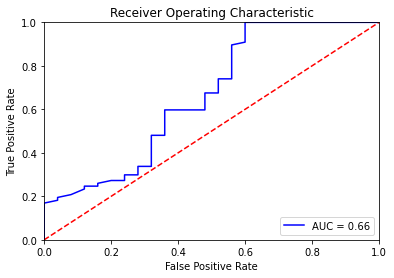

In [100]:
# Evaluate the Bert classifier
evaluate_roc(probs, y_val)

In [101]:
# Concatenate the train set and the validation set
full_train_data = torch.utils.data.ConcatDataset([train_data, val_data])
full_train_sampler = RandomSampler(full_train_data)
full_train_dataloader = DataLoader(full_train_data, sampler=full_train_sampler, batch_size=32)

# Train the Bert Classifier on the entire training data
set_seed(42)
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, full_train_dataloader, epochs=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/Users/swu/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be remov

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.537399   |     -      |     -     |  1326.46 
   1    |   31    |   0.380354   |     -      |     -     |  663.29  
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   2    |   20    |   0.340110   |     -      |     -     |  1159.20 
   2    |   31    |   0.337821   |     -      |     -     |  604.80  
----------------------------------------------------------------------


Training complete


In [102]:
model = MyModel(num_classes).to(device)
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=1e-2)
output_model = './models/nameOfYourModel.pth'

# save
def save(model, optimizer):
    # save
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict()
    }, output_model)

save(model, optimizer)

# load
checkpoint = torch.load(output_model, map_location='cpu')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

NameError: name 'model' is not defined